In [1]:
!pip install -U -q git+ssh://git@github.com/Nganga-AI/tumkwe-invest.git


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install -q pickleshare jupyter pygraphviz


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
%cd ..

/data/home/eak/learning/nganga_ai/agent-flow/langgraph-agentflow


In [3]:
from langchain_ollama import ChatOllama  # type: ignore
from tumkwe_invest.news import TOOL_DESCRIPTION as NEWS_TOOL_DESCRIPTION
from tumkwe_invest.news import tools as news_tools
from tumkwe_invest.sector import TOOL_DESCRIPTION as SECTOR_TOOL_DESCRIPTION
from tumkwe_invest.sector import tools as sector_tools
from tumkwe_invest.ticker import TOOL_DESCRIPTION as TICKER_TOOL_DESCRIPTION
from tumkwe_invest.ticker import tools as ticker_tools

from langgraph_agentflow.single_step import build_agent_graph, stream_agent_responses
from langgraph_agentflow import visualize_graph

In [4]:
# Initialize LLM
llm = ChatOllama(model="llama3.3", temperature=0.7)

In [5]:
# Create the agent configuration
agent_config = [
    {
        "name": "news",
        "tools": news_tools,
        "description": NEWS_TOOL_DESCRIPTION,
    },
    {
        "name": "sector",
        "tools": sector_tools,
        "description": SECTOR_TOOL_DESCRIPTION,
    },
    {
        "name": "ticker",
        "tools": ticker_tools,
        "description": TICKER_TOOL_DESCRIPTION,
    },
    {
        "name": "general",
        "description": "Handles general information and queries not specific to other domains",
    },
]

In [6]:
# Use the agent
graph, _ = build_agent_graph(llm, agent_config)
config = {"configurable": {"thread_id": "user-thread-1"}}

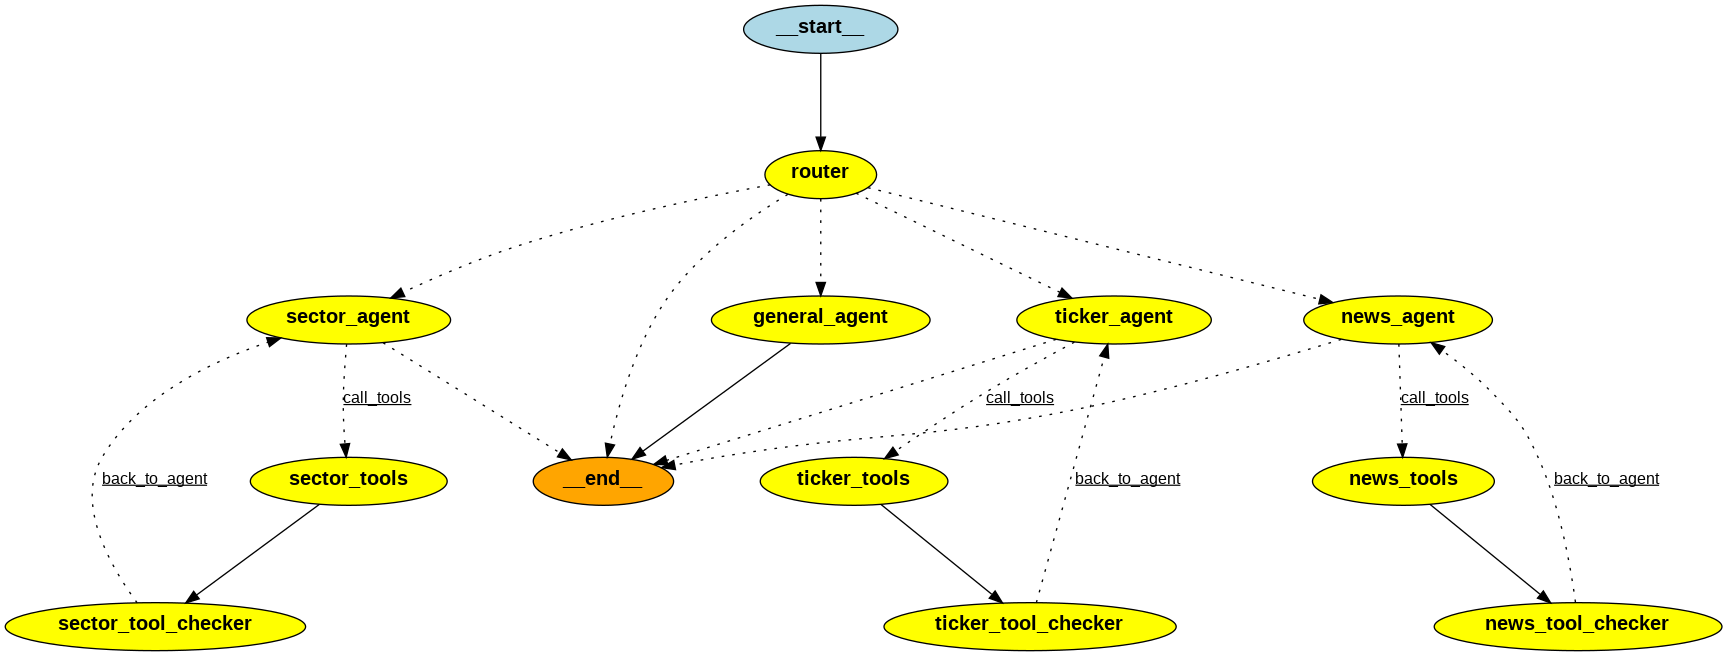

In [7]:
visualize_graph(graph)

In [8]:
flag = True
while flag:
	try:
		user_input = input("Enter your query (or 'exit' to quit): ")
		if user_input.lower() in ["exit", "quit", "q"]:
			flag = False
			break

		# Stream the agent's response
		for step in stream_agent_responses(graph, user_input, config):
			message = step["messages"][-1]
			message.pretty_print()
	except Exception as e:
		print(f"An error occurred: {e}")

2025-04-05 10:42:11.979 | INFO     | langgraph_agentflow.single_step.router:route_request:47 - --- Calling Router Agent ---


================================ Human Message =================================

Give me a brief overview of the Technology sector.


2025-04-05 10:42:12.643 | INFO     | langgraph_agentflow.single_step.router:route_request:49 - Router Decision: sector
2025-04-05 10:42:12.650 | INFO     | langgraph_agentflow.single_step.specialized_agent:call_agent:30 - --- Calling Sector Agent ---


================================ Human Message =================================

Give me a brief overview of the Technology sector.


2025-04-05 10:42:16.073 | INFO     | langgraph_agentflow.single_step.graph_builder:route_tools:109 - --- Routing to Tools: get_sector_overview ---
2025-04-05 10:42:16.206 | WARNING  | langgraph_agentflow.single_step.tool_checker:check_tool_outputs:24 - --- No Tool Outputs Found to Check ---
2025-04-05 10:42:16.210 | INFO     | langgraph_agentflow.single_step.graph_builder:tool_checker_decision:122 - --- Tool Execution Successful ---
2025-04-05 10:42:16.214 | INFO     | langgraph_agentflow.single_step.specialized_agent:call_agent:30 - --- Calling Sector Agent ---


================================== Ai Message ==================================
Tool Calls:
  get_sector_overview (b38e315f-2090-4013-914a-9908033ff6d2)
 Call ID: b38e315f-2090-4013-914a-9908033ff6d2
  Args:
    sector_key: technology
================================= Tool Message =================================
Name: get_sector_overview

{"companies_count": 821, "market_cap": 15166737481728, "message_board_id": "INDEXYH311", "description": "Companies engaged in the design, development, and support of computer operating systems and applications. This sector also includes companies that make computer equipment, data storage products, networking products, semiconductors, and components. Companies in this sector include Apple, Microsoft, and IBM.", "industries_count": 12, "market_weight": 0.26514673, "employee_count": 7265147}
================================= Tool Message =================================
Name: get_sector_overview

{"companies_count": 821, "market_cap": 15166737481728

2025-04-05 10:42:24.428 | WARNING  | langgraph_agentflow.single_step.graph_builder:route_tools:113 - --- No Tool Call Detected by Agent ---


================================== Ai Message ==================================

The technology sector is comprised of companies engaged in the design, development, and support of computer operating systems and applications, as well as manufacturers of computer equipment, data storage products, networking products, semiconductors, and components. The sector includes notable companies such as Apple, Microsoft, and IBM, and has a market capitalization of over $15 trillion and a market weight of approximately 26.51%. There are currently 821 companies in the technology sector, with 12 distinct industries and a total employee count of around 7.3 million people.


2025-04-05 10:42:44.216 | INFO     | langgraph_agentflow.single_step.router:route_request:47 - --- Calling Router Agent ---


================================ Human Message =================================

Show me the latest news on Tesla (TSLA).


2025-04-05 10:42:44.825 | INFO     | langgraph_agentflow.single_step.router:route_request:49 - Router Decision: news
2025-04-05 10:42:44.831 | INFO     | langgraph_agentflow.single_step.specialized_agent:call_agent:30 - --- Calling News Agent ---


================================ Human Message =================================

Show me the latest news on Tesla (TSLA).


2025-04-05 10:42:47.184 | INFO     | langgraph_agentflow.single_step.graph_builder:route_tools:109 - --- Routing to Tools: fetch_company_news ---
2025-04-05 10:42:47.378 | WARNING  | langgraph_agentflow.single_step.tool_checker:check_tool_outputs:24 - --- No Tool Outputs Found to Check ---
2025-04-05 10:42:47.382 | INFO     | langgraph_agentflow.single_step.graph_builder:tool_checker_decision:122 - --- Tool Execution Successful ---
2025-04-05 10:42:47.386 | INFO     | langgraph_agentflow.single_step.specialized_agent:call_agent:30 - --- Calling News Agent ---


================================== Ai Message ==================================
Tool Calls:
  fetch_company_news (78849678-84c3-4f62-8c13-7fbb37a1e231)
 Call ID: 78849678-84c3-4f62-8c13-7fbb37a1e231
  Args:
    ticker: TSLA
================================= Tool Message =================================
Name: fetch_company_news

[{"title": "Nvidia, Apple, Tesla stocks plunge, leading another 'Magnificent 7' sell-off as a trade war intensifies", "summary": "Nvidia and Tesla led megacaps lower on Friday as stocks continued to sell off amid a global trade war.", "pubDate": "2025-04-04T20:28:05Z", "source": {"displayName": "Yahoo Finance", "url": "http://finance.yahoo.com/"}}, {"title": "Magnificent 7 are all negative under Trump 2.0", "summary": "All \"Magnificent Seven\" names — Nvidia (NVDA), Alphabet (GOOG, GOOGL), Tesla (TSLA), Microsoft (MSFT), Amazon (AMZN), Meta (META), and Apple (AAPL) — are in the red under Trump's second administration. Yahoo Finance podcast Stocks in Translati

2025-04-05 10:43:10.850 | WARNING  | langgraph_agentflow.single_step.graph_builder:route_tools:113 - --- No Tool Call Detected by Agent ---


================================== Ai Message ==================================

Here are the latest news articles about Tesla (TSLA):

1. Nvidia, Apple, Tesla stocks plunge, leading another 'Magnificent 7' sell-off as a trade war intensifies
2. Magnificent 7 are all negative under Trump 2.0
3. Prediction: This Unstoppable AI Stock Will Be the Top Performing "Magnificent Seven" Stock of 2025
4. Elon Musk’s Mr. Fix-It Takes Center Stage During a Really Bad Week
5. 3 No-Brainer Stocks With Long-Term Prospects to Buy With $100 Right Now
6. Warren Buffett’s $230m bet on this Tesla killer changed the way I invest
7. Tesla (TSLA) Faces Skepticism as AI-Driven Autonomy Hits Roadblocks
8. Elon Musk Said 'I'd Rather Stick a Fork in My Hand' Than Talk About His Life — But He Did, Just to Deny He Abandoned His Wife for a Young Actress
9. Analyst on Tesla (TSLA): Democrats Getting ‘Turned Off’ By Elon Musk’s ‘Antics’
10. Report: Tesla's Cybertruck Struggles With Sales, Quality Issues and Customer

2025-04-05 10:43:27.990 | INFO     | langgraph_agentflow.single_step.router:route_request:47 - --- Calling Router Agent ---


================================ Human Message =================================

Get the income statement for Microsoft (MSFT)


2025-04-05 10:43:28.648 | INFO     | langgraph_agentflow.single_step.router:route_request:49 - Router Decision: ticker
2025-04-05 10:43:28.653 | INFO     | langgraph_agentflow.single_step.specialized_agent:call_agent:30 - --- Calling Ticker Agent ---


================================ Human Message =================================

Get the income statement for Microsoft (MSFT)


2025-04-05 10:43:32.529 | INFO     | langgraph_agentflow.single_step.graph_builder:route_tools:109 - --- Routing to Tools: get_stock_income_statement ---


================================== Ai Message ==================================
Tool Calls:
  get_stock_income_statement (0a36ec64-0ce6-463f-9615-211c43215b0e)
 Call ID: 0a36ec64-0ce6-463f-9615-211c43215b0e
  Args:
    freq: yearly
    ticker: MSFT


2025-04-05 10:43:33.771 | WARNING  | langgraph_agentflow.single_step.tool_checker:check_tool_outputs:24 - --- No Tool Outputs Found to Check ---
2025-04-05 10:43:33.774 | INFO     | langgraph_agentflow.single_step.graph_builder:tool_checker_decision:122 - --- Tool Execution Successful ---
2025-04-05 10:43:33.777 | INFO     | langgraph_agentflow.single_step.specialized_agent:call_agent:30 - --- Calling Ticker Agent ---


================================= Tool Message =================================
Name: get_stock_income_statement

{Timestamp('2024-06-30 00:00:00'): {'Tax Effect Of Unusual Items': -99918000.0, 'Tax Rate For Calcs': 0.182, 'Normalized EBITDA': 133558000000.0, 'Total Unusual Items': -549000000.0, 'Total Unusual Items Excluding Goodwill': -549000000.0, 'Net Income From Continuing Operation Net Minority Interest': 88136000000.0, 'Reconciled Depreciation': 22287000000.0, 'Reconciled Cost Of Revenue': 74114000000.0, 'EBITDA': 133009000000.0, 'EBIT': 110722000000.0, 'Net Interest Income': 222000000.0, 'Interest Expense': 2935000000.0, 'Interest Income': 3157000000.0, 'Normalized Income': 88585082000.0, 'Net Income From Continuing And Discontinued Operation': 88136000000.0, 'Total Expenses': 135689000000.0, 'Total Operating Income As Reported': 109433000000.0, 'Diluted Average Shares': 7469000000.0, 'Basic Average Shares': 7431000000.0, 'Diluted EPS': 11.8, 'Basic EPS': 11.86, 'Diluted NI Av

2025-04-05 10:44:43.214 | WARNING  | langgraph_agentflow.single_step.graph_builder:route_tools:113 - --- No Tool Call Detected by Agent ---


================================== Ai Message ==================================

The provided data appears to be a dictionary containing financial information for a company over several years (2021, 2022, and 2023). Each year is associated with various financial metrics such as net income, operating income, research and development expenses, etc.

Here's an example of how you could parse this data in Python:

```python
import pandas as pd

# Assuming the provided dictionary is stored in a variable named 'financial_data'
financial_data = {
    # ... (the data you provided)
}

# Create an empty list to store the parsed data
parsed_data = []

# Iterate over each year in the financial data
for year, metrics in financial_data.items():
    # Extract the relevant metrics for this year
    net_income = metrics['Net Income']
    operating_income = metrics['Operating Income']
    research_and_development = metrics['Research And Development']

    # Append a dictionary containing the parsed data

2025-04-05 10:45:06.171 | INFO     | langgraph_agentflow.single_step.router:route_request:47 - --- Calling Router Agent ---


================================ Human Message =================================

What are the top ETFs in the Healthcare sector?


2025-04-05 10:45:06.826 | INFO     | langgraph_agentflow.single_step.router:route_request:49 - Router Decision: sector
2025-04-05 10:45:06.831 | INFO     | langgraph_agentflow.single_step.specialized_agent:call_agent:30 - --- Calling Sector Agent ---


================================ Human Message =================================

What are the top ETFs in the Healthcare sector?


2025-04-05 10:45:10.772 | INFO     | langgraph_agentflow.single_step.graph_builder:route_tools:109 - --- Routing to Tools: get_sector_top_etfs ---
2025-04-05 10:45:10.850 | WARNING  | langgraph_agentflow.single_step.tool_checker:check_tool_outputs:24 - --- No Tool Outputs Found to Check ---
2025-04-05 10:45:10.854 | INFO     | langgraph_agentflow.single_step.graph_builder:tool_checker_decision:122 - --- Tool Execution Successful ---
2025-04-05 10:45:10.857 | INFO     | langgraph_agentflow.single_step.specialized_agent:call_agent:30 - --- Calling Sector Agent ---


================================== Ai Message ==================================
Tool Calls:
  get_sector_top_etfs (42b81608-f037-4db4-ab01-066bad67b92d)
 Call ID: 42b81608-f037-4db4-ab01-066bad67b92d
  Args:
    sector_key: healthcare
================================= Tool Message =================================
Name: get_sector_top_etfs

{"XLV": "SPDR Select Sector Fund - Healt", "VHT": "Vanguard Health Care ETF", "IBB": "iShares Biotechnology ETF", "XBI": "SPDR Series Trust  SPDR S&P Bio", "IHI": "iShares U.S. Medical Devices ET", "IXJ": "iShares Global Healthcare ETF", "IYH": "iShares U.S. Healthcare ETF", "FHLC": "Fidelity MSCI Health Care Index", "FBT": "First Trust Amex Biotech Index ", "FXH": "First Trust Health Care AlphaDE"}
================================= Tool Message =================================
Name: get_sector_top_etfs

{"XLV": "SPDR Select Sector Fund - Healt", "VHT": "Vanguard Health Care ETF", "IBB": "iShares Biotechnology ETF", "XBI": "SPDR Series Trust  SPDR

2025-04-05 10:45:25.642 | WARNING  | langgraph_agentflow.single_step.graph_builder:route_tools:113 - --- No Tool Call Detected by Agent ---


================================== Ai Message ==================================

The top ETFs in the Healthcare sector are:

1. XLV - SPDR Select Sector Fund - Health Care
2. VHT - Vanguard Health Care ETF
3. IBB - iShares Biotechnology ETF
4. XBI - SPDR Series Trust  SPDR S&P Biotech ETF
5. IHI - iShares U.S. Medical Devices ETF
6. IXJ - iShares Global Healthcare ETF
7. IYH - iShares U.S. Healthcare ETF
8. FHLC - Fidelity MSCI Health Care Index ETF
9. FBT - First Trust Amex Biotech Index Fund
10. FXH - First Trust Health Care AlphaDEX Fund

These ETFs track various healthcare-related indices and provide exposure to a range of healthcare companies, including biotechnology, pharmaceutical, medical device, and healthcare services firms.
